# codecentric.AI Bootcamp
## Praxis: Machine Learning Basics

Willkommen bei der Lektion zu Machine Learning Basics.

Um das Erklärvideo zu diesem Notebook zu laden, führe folgende Zelle aus:


In [1]:
# lade Video
from IPython.display import IFrame    
IFrame('https://www.youtube.com/embed/xxx', width=850, height=650)

# Setup

Wir beginnen sehr einfach, um auch die Leute abzuholen, die nicht viel Python Erfahrung haben. 
Wenn Dir das Kapitel zu einfach erscheint - keine Sorge, im folgenden Kurs wird der Code noch anspruchsvoller ;)

Zunächst importieren wir wieder die benötigten Libraries.

- numpy für effiziente Verarbeitung von multidimensionalen Arrays
- matplotlib um Daten zu Visualisieren

In [50]:
# magic Function, damit die matplotlib Visualisierungen im Jupyter Notebook angezeigt werden (und nicht in Extra Fenster)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random

Jetzt definieren wir eine einfache Funktion und generieren damit ein paar Datenpunkte.

Die lambda Schreibweise ist in Python eine anonyme Funktion - man hätte auch def f(x): return 1.5*x+5 schreiben können.

Die Notation mit [x for x in something] ist ein sogenannte Python List Comprehension. Dies werden wir häufig verwenden und sehen. So können wir in einer kompakten Schreibweise Listen, Arrays und Dictionaries erzeugen.

In [67]:
# zunächst definieren wir eine Funktion, die wir annähern wollen
f = lambda x: 1.5*x*x + 5
num_datenpunkte = 8

daten = np.array( [(x, f(x)) for x in range(num_datenpunkte)] )

# jetzt geben wir die ersten beiden Tupel aus. Die Notation [:3] könnte man auch als [0:3] schreiben und bedeutet hier: 
# Elemente von 0 bis nicht einschliesslich 3
print(daten[:3])

[[ 0.   5. ]
 [ 1.   6.5]
 [ 2.  11. ]]


Jetzt visualisieren wir die Daten mit Matplotlib.

Wir setzen die Parameter xlim und ylim um den Ursrpung des Koordinatensystems bei 0,0 beginnen zu lassen.

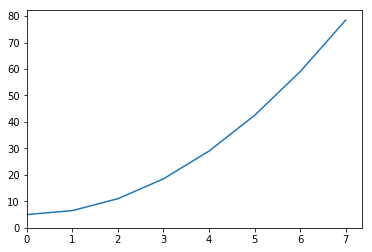

In [68]:
plt.plot(daten[:, 0], daten[:, 1])
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()

In [79]:
# jetzt generieren wir nocheinmal ähnliche Daten aber mit einer leichten Abweichung
# die Function random.randint(-2,2) liefert Zufallszahlen zwischen -2 und 2
noisy_daten = np.array( [(x, f(x) + random.randint(-2,2)*x) for x in range(num_datenpunkte)] )

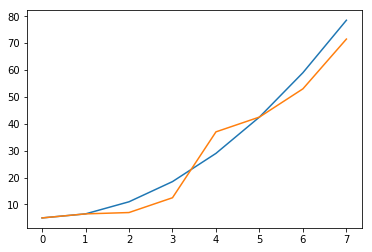

In [80]:
# und nun zeigen wir beides in einem Bild an
plt.plot(daten[:, 1])
plt.plot(noisy_daten[:, 1])

# Kosten Funktionen / Abweichung zwischen Modell und Daten messen

Jetzt übertragen wir dieses einfache Beispiel auf ein Problem, dass wir mit Machine Learning lösen wollen.
Die "noisy_daten" sind dabei die Daten, die wir beobachtet haben (also unsere Labels). Im Alltag gibt es keine exakten Modelle - sondern Daten haben immer gewisse Abweichungen.

Die Funktion f(x) ist dabei das Modell, das wir lernen wollen. Also das Prinzip hinter diesen Daten.

Ein einfacher Ansatz wäre nun, dass man einfach ein paar Modelle ausprobiert und versucht zu messen, wie gut dieses Modell zu unseren Labels passt. Um dies messen zu können, verwenden wir Kosten Funktionen.

In [110]:
# einfache Fehler Funktion
fehler = lambda x, y: abs(x - y)

gesamt_fehler = 0

# für jeden Datenpunkt berechne die Abweichung zwischen Modell und noisy_daten
for i in range(num_datenpunkte):
    e = fehler(daten[i, 1], noisy_daten[i, 1])
    print("Abweichung bei x={0} ist: {1}".format(i, e))
    gesamt_fehler += e
    
print("Fehler insgesamt: {}".format(gesamt_fehler))

Abweichung bei x=0 ist: 0.0
Abweichung bei x=1 ist: 0.0
Abweichung bei x=2 ist: 4.0
Abweichung bei x=3 ist: 6.0
Abweichung bei x=4 ist: 8.0
Abweichung bei x=5 ist: 0.0
Abweichung bei x=6 ist: 6.0
Abweichung bei x=7 ist: 7.0
Fehler insgesamt: 31.0


### Das gleiche mit numpy

Das ganze geht auch einfacher.

for loops können bei großen Datasets sehr langsam sein. Deshalb verwenden wir numpy:

In [114]:
gesamt_fehler_numpy = np.sum(abs( daten[:, 1] - noisy_daten[:, 1]))

In [112]:
print(gesamt_fehler_numpy)

31.0


### Zum Vergleich ein anderes Modell

In [117]:
lineares_modell = lambda x: 2*x + 3

andere_daten = np.array( [(x, lineares_modell(x)) for x in range(num_datenpunkte)] )

gesamt_fehler_numpy_andere = np.sum(abs( andere_daten[:, 1] - noisy_daten[:, 1]))
print(gesamt_fehler_numpy_andere)

155.0


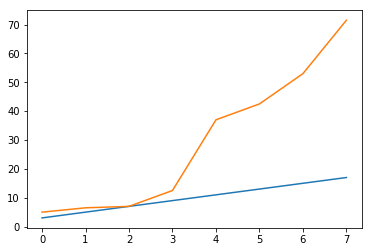

In [118]:
# hier noch eine Visualisierung mit dem linearen Modell
plt.plot(andere_daten[:, 1])
plt.plot(noisy_daten[:, 1])

### Fazit:

- Durch die Ermittlung des "Gesamten Fehlers" können wir die beiden Modelle einfach miteinander vergleichen.
- Wir sehen, dass der Fehler beim ersten Modell geringer ist als beim zweiten.
- In der Visualisierung können wir vermuten, dass unser lineares Modell hier "zu einfach" ist und nicht unsere Daten repräsentieren kann. Wobei man bei diesem Ausschnitt noch nicht genau sieht, dass die Daten nicht linear sind.

Aber wir wollen ja beim Machine Learning nicht manuell verschiedene Modelle und Parameter ausprobieren.
Bei diesem einfachen Beispiel ist das zwar noch möglich - in der Praxis sind Modelle aber viel komplexer und lassen sich nicht mehr intuitiv bestimmen. Dennoch sind die Prinzipien die gleichen - es geht darum Parameter "auszuprobieren" und den Fehler zu messen. Mit Hilfe von Kosten-Funktionen lassen sich effiziente Algorithmen implementieren, die die Parameter eines Modells iterativ annähern. Wir haben in diesem Beispiel die Summe der Absoluten Fehler zwischen dem Modell und den Labels verwendet. Diese wird natürlich immer größer, je mehr Datenpunkte wir "testen". Daher kann man diesen noch durch die Anzahl der Datenpunkte teilen und erhält so eine einfache Kostenfunktion: den **"Mean Absolute Error"**



In [122]:
MAE_modell_1 = gesamt_fehler_numpy / num_datenpunkte
MAE_modell_2 = gesamt_fehler_numpy_andere / num_datenpunkte
print(MAE_modell_1, MAE_modell_2)

3.875 19.375


# Generalisieren vs. Over- / Underfitting

## Daten splitten

In [ ]:
# warum machen wir das?

## Klassifikation vs. Regression

## Accuracy messen

## Precision vs. Recall